# **Proyek Analisis Data: Bike Sharing Dataset**

- **Nama:** Tan Bima Wiragama
- **Email:** tanbimawiragama@gmail.com
- **ID Dicoding:** tanbima

## **Menentukan Pertanyaan Bisnis**

- Bagaimana pola penggunaan sepeda berbeda antara hari kerja dan akhir pekan?
- Apakah ada tren peningkatan atau penurunan penggunaan sepeda dari tahun ke tahun?
- Apakah terdapat jam-jam puncak (peak hours) penggunaan sepeda yang konsisten setiap hari?

## **Import Semua Packages/Library yang Digunakan**

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans

## **Data Wrangling**

### **Gathering Data**

Pada tahap ini akan dikumpulkan data yang telah diunduh pada website **kaggle.com**. Karena saya memilih **Bike Sharing Dataset**, maka dibaca file CSV **(day.csv dan hour.csv)** dan menampilkannya dalam bentuk DataFrame dengan lima baris pertama untuk melihat struktur dan konten data.

### *Load Tabel Day*

In [294]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### *Load Tabel Hour*

In [295]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

### *Menilai day_df*

1.   Pengecekan tipe data

In [296]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat terlihat, terdapat beberapa tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah **dteday (seharusnya tipe data: datetime)**. Kemudian, data **season, weathersit, weekday, mnth, yr** seharusnya tipe data **categorical** karena analisisnya akan lebih mudah dibaca dan dimengerti oleh manusia.

2.   Pengecekan adanya missing value **(aman)**

In [297]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3.   Pengecekan adanya duplikasi data **(aman)**

In [298]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


4.   Pengecekan adanya anomali pada parameter statistik **(aman)**

In [299]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


5.   Pengecekan adanya outlier pada variabel numerik

In [300]:
numerical_var = ['temp', 'atemp', 'hum', 'windspeed']

In [301]:
# Total outliers pada tiap kolom
Q1 = day_df[numerical_var].quantile(0.25)
Q3 = day_df[numerical_var].quantile(0.75)

IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

outliers_count = ((day_df[numerical_var] < lower_bound) | (day_df[numerical_var] > upper_bound)).sum()
print(outliers_count)

temp          0
atemp         0
hum           2
windspeed    13
dtype: int64


Pada data day_df terdapat outlier pada kolom **hum** dan **windspeeed**. Namun, dalam hal ini saya tidak menghapusnya ataupun mengganti dengan nilai lain karena kelembaban dan kecepatan angin adalah variabel yang bisa sangat bervariasi tergantung pada kondisi alamiah seperti cuaca, iklim, dan musim. Oleh karena itu, fluktuasi ekstrim dalam data kelembaban dan kecepatan angin bisa menjadi refleksi dari variasi alamiah data ini.

### *Menilai hour_df*

1.   Pengecekan tipe data

In [302]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat terlihat, terdapat beberapa tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah **dteday (seharusnya tipe data: datetime)**. Kemudian, data **season, weathersit, weekday, mnth, yr** seharusnya tipe data **categorical** karena analisisnya akan lebih mudah dibaca dan dimengerti oleh manusia.

2.   Pengecekan adanya missing value **(aman)**

In [303]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3.   Pengecekan adanya duplikasi data **(aman)**

In [304]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


4.   Pengecekan adanya anomali pada parameter statistik **(aman)**

In [305]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


5.   Pengecekan adanya outlier pada variabel numerik

In [306]:
numerical_var = ['temp', 'atemp', 'hum', 'windspeed']

In [307]:
# Total outliers pada tiap kolom
Q1 = hour_df[numerical_var].quantile(0.25)
Q3 = hour_df[numerical_var].quantile(0.75)

IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

outliers_count = ((hour_df[numerical_var] < lower_bound) | (hour_df[numerical_var] > upper_bound)).sum()
print(outliers_count)

temp           0
atemp          0
hum           22
windspeed    342
dtype: int64


Pada data day_df terdapat outlier pada kolom **hum** dan **windspeeed**. Namun, dalam hal ini saya tidak menghapusnya ataupun mengganti dengan nilai lain karena kelembaban dan kecepatan angin adalah variabel yang bisa sangat bervariasi tergantung pada kondisi alamiah seperti cuaca, iklim, dan musim. Oleh karena itu, fluktuasi ekstrim dalam data kelembaban dan kecepatan angin bisa menjadi refleksi dari variasi alamiah data ini.

### **Cleaning Data**

1.   Mengubah beberapa detail pada beberapa kolom day_df


In [308]:
# Mengubah label kolom
day_df.rename(columns={
    'dteday': 'date_day',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_sit',
    'cnt': 'count',
    'hum': 'humid',
    'weekday': 'week_day'
}, inplace=True)

In [309]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['week_day'] = day_df['week_day'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_sit'] = day_df['weather_sit'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [310]:
# Mengubah beberapa tipe data variabel
day_df['date_day'] = pd.to_datetime(day_df.date_day)
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['week_day'] = day_df.week_day.astype('category')
day_df['weather_sit'] = day_df.weather_sit.astype('category')

In [311]:
day_df.head()

,instant,date_day,season,year,month,holiday,week_day,workingday,weather_sit,temp,atemp,humid,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600



2.   Mengubah beberapa detail pada beberapa kolom hour_df


In [312]:
# Mengubah label kolom
hour_df.rename(columns={
    'dteday': 'date_day',
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_sit',
    'cnt': 'count',
    'hum': 'humid',
    'weekday': 'week_day'
}, inplace=True)

In [313]:
# Mengubah angka menjadi keterangan
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['week_day'] = hour_df['week_day'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weather_sit'] = hour_df['weather_sit'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [314]:
# Mengubah beberapa tipe data variabel
hour_df['date_day'] = pd.to_datetime(hour_df.date_day)
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['week_day'] = hour_df.week_day.astype('category')
hour_df['weather_sit'] = hour_df.weather_sit.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [315]:
hour_df.head()

,instant,date_day,season,year,month,hour,holiday,week_day,workingday,weather_sit,temp,atemp,humid,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## **Exploratory Data Analysis (EDA)**

### **Explore Data day_df**

1.   Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan bulan (2011-2012)

In [316]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'std', 'sum']
})

count                                        
        max   min         mean          std     sum
month                                              
Apr    7460   795  4484.900000  1776.160778  269094
Aug    7865  1115  5664.419355  1494.516146  351194
Dec    6606   441  3403.806452  1549.639353  211036
Feb    5062  1005  2655.298246  1145.313307  151352
Jan    4521   431  2176.338710  1161.674370  134933
Jul    8173  3285  5563.677419  1273.751871  344948
Jun    8120  3767  5772.366667  1240.400031  346342
Mar    8362   605  3692.258065  1899.301812  228920
May    8294  2633  5349.774194  1298.711561  331686
Nov    6852  1495  4247.183333  1285.712709  254831
Oct    8156    22  5199.225806  1988.392517  322352
Sep    8714  1842  5766.516667  1810.130649  345991

Berdasarkan hasil di atas, dapat terlihat bahwa jumlah total keseluruhan penyewa sepeda terbanyak terjadi pada bulan **Agustus** dan yang paling kecil pada bulan **Januari**. Kemudian, penyewa terbanyak dalam 1 hari terdapat pada bulan **September** dan terkecil pada bulan **Oktober**

2.   Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan hari libur atau tidak

In [317]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil di atas, dapat terlihat bahwa penyewa sepeda lebih sering menyewa pada **hari biasa**. Hal ini tidak dapat dipungkiri karena hari biasa jauh lebih banyak dari hari libur dalam sistem kalender

3.   Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan situasi cuaca hari itu

In [318]:
day_df.groupby(by='weather_sit').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                  max  min         mean      sum
weather_sit                                     
Clear            8714  431  4876.786177  2257952
Cloudy           8362  605  4035.862348   996858
Light Snow/Rain  4639   22  1803.285714    37869

Berdasarkan hasil di atas, dapat terlihat bahwa penyewa sepeda lebih banyak menyewa pada saat kondisi cuaca **cerah** pada hari tersebut. Namun, sangat sedikit pada saat cuaca **hujan ringan atau salju**.

4.   Mengelompokkan penyewa sepeda berdasarkan bulan, dan hari

In [319]:
grouped_data = day_df.groupby(by=['month', 'week_day']).agg({
    'casual': 'max',
    'registered': 'max',
    'count': 'max'
})

grouped_data['count'].idxmax()

('Sep', 'Sat')

In [320]:
grouped_data['casual'].idxmax()

('May', 'Sat')

In [321]:
grouped_data['registered'].idxmax()

('Sep', 'Wed')

Berdasarkan hasil di atas, dapat terlihat bahwa penyewa sepeda secara keseluruhan lebih banyak menyewa pada **bulan September, hari Sabtu**. Sementara itu, untuk penyewa harian paling banyak pada **bulan May, hari sabtu**, sedangkan untuk penyewa yang sudah berlangganan paling banyak pada **bulan September, hari Rabu**

5.   Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan situasi cuaca hari itu

In [322]:
day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum'],
})

count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Berdasarkan hasil di atas, dapat terlihat bahwa secara total maupun per harinya penyewa sepeda lebih banyak menyewa pada saat **musim gugur**

6.   Bagaimana hubungan antara jumlah penyewa (counnt) dan Temperature

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


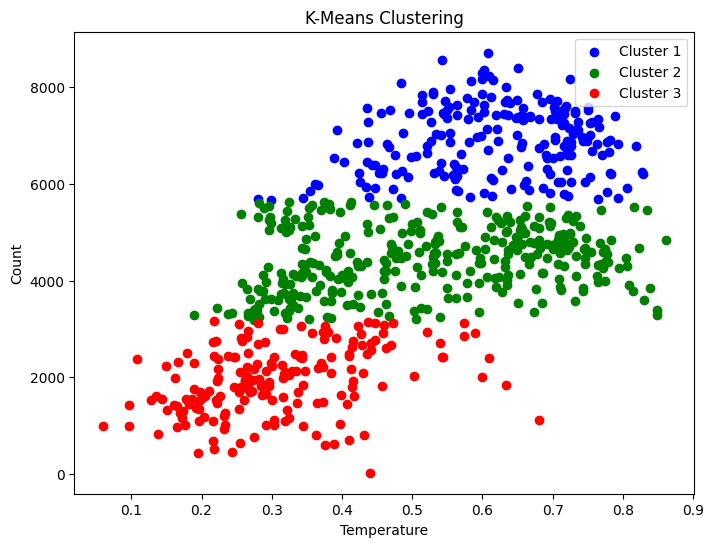

In [323]:
# Mengambil kolom numerik
numeric_data = day_df[['temp', 'count']]

# Menentukan jumlah cluster
num_clusters = 3

# Menerapkan algoritma K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
day_df['cluster'] = kmeans.fit_predict(numeric_data)

# Mendefinisikan warna untuk setiap klaster
colors = ['blue', 'green', 'red']

# Memvisualisasikan hasil clustering
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = day_df[day_df['cluster'] == i]
    plt.scatter(cluster_data['temp'], cluster_data['count'], c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

K-Means Clustering digunakan untuk mengelompokkan data ke dalam beberapa kelompok atau klaster berdasarkan kemiripan antara data **count** dan **temp**. Berikut hasilnya:

*   Klaster 1 (biru) relatif memiliki jumlah penyewa yang tinggi pada saat suhu menengah ke atas
*   Klaster 2 (hijau) relatif memiliku jumlah penyewa menengah pada kondisi berbagai suhu
*   Klaster 3 (merah) relatif memiliki jumlah penyewa yang rendah pada saat suhu yang rendah juga






### **Explore Data hour_df**



1.   Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan jam penyewaannya


In [331]:
hour_df.groupby(by='hour').agg({
    'count': ['max', 'min', 'sum']
})

count            
       max min     sum
hour                  
0      283   2   39130
1      168   1   24164
2      132   1   16352
3       79   1    8174
4       28   1    4428
5       66   1   14261
6      213   1   55132
7      596   1  154171
8      839   5  261001
9      426  14  159438
10     539   8  126257
11     663  10  151320
12     776   3  184414
13     760  11  184919
14     750  12  175652
15     750   7  183149
16     783  11  227748
17     976  15  336860
18     977  23  309772
19     743  11  226789
20     567  11  164550
21     584   6  125445
22     502   9   95612
23     256   2   63941

Dari hasil data di atas didapatkan bahwa jam 17:00-18:00 merupakan puncak penggunaan sepeda, sedangkan jam 8:00-9:00 adalah puncak penggunaan sepeda di pagi hari. Penggunaan sepeda cenderung lebih rendah pada malam hari (setelah jam 20:00).

## **Visualization & Explanatory Analysis**


### **Pertanyaan 1: Bagaimana pola penggunaan sepeda berbeda antara hari kerja dan akhir pekan?**

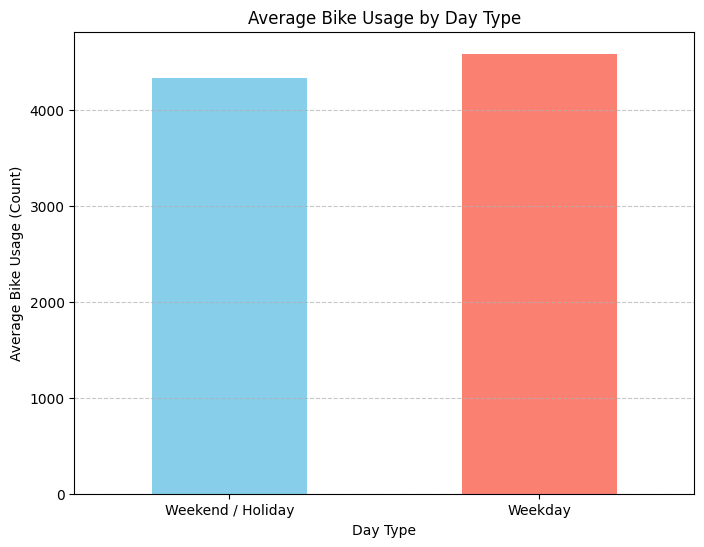

In [324]:
# Mengelompokkan data berdasarkan workingday dan menghitung rata-rata count
usage_by_day_type = day_df.groupby('workingday')['count'].mean()

# Membuat plot
plt.figure(figsize=(8, 6))
usage_by_day_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Bike Usage by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Average Bike Usage (Count)')
plt.xticks([0, 1], ['Weekend / Holiday', 'Weekday'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dapat terlihat bahwa rata-rata penyewaan sepeda lebih banyak pada saat hari **Weekday**

### **Pertanyaan 2: Apakah ada tren peningkatan atau penurunan penggunaan sepeda dari tahun ke tahun?**

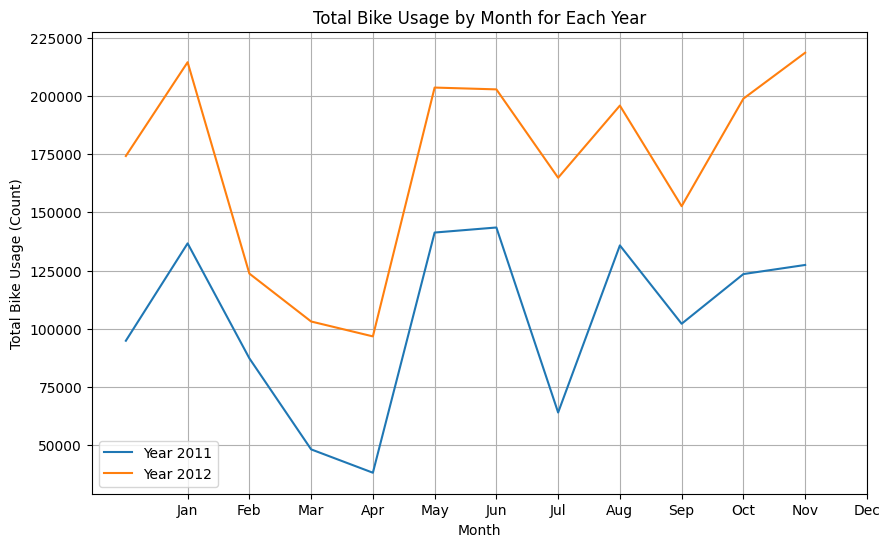

In [325]:
# Kelompokkan data berdasarkan tahun dan bulan, dan hitung total penggunaan sepeda
usage_by_year_month = day_df.groupby(['year', 'month'])['count'].sum()

# Ubah hasil grouping menjadi DataFrame agar lebih mudah diplot
usage_by_year_month = usage_by_year_month.reset_index()

# Membuat line chart
plt.figure(figsize=(10, 6))

# Loop melalui setiap tahun
for year in usage_by_year_month['year'].unique():
    data_year = usage_by_year_month[usage_by_year_month['year'] == year]
    plt.plot(data_year['month'], data_year['count'], label=f"Year {year+2011}")

plt.title('Total Bike Usage by Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Bike Usage (Count)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

Pada tahun 2011, penggunaan sepeda mencapai puncak pada bulan **Juni**. Sementara itu, tahun 2012, penggunaan sepeda mencapai puncak pada bulan **November**.

### **Pertanyaan 3: Apakah terdapat jam-jam puncak (peak hours) penggunaan sepeda yang konsisten setiap hari?**

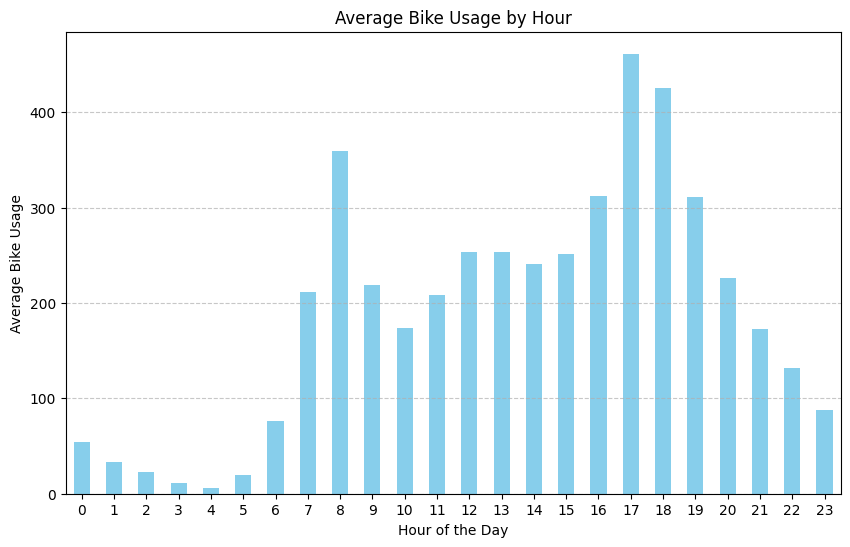

In [326]:
# Kelompokkan data berdasarkan jam dan hitung rata-rata jumlah penggunaan sepeda untuk setiap jam
peak_hours = hour_df.groupby('hour')['count'].mean()

# Plot hasil
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar', color='skyblue')
plt.title('Average Bike Usage by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Usage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Grafik ini memberikan wawasan tentang tren harian penggunaan sepeda. Penggunaan sepeda paling **tinggi** terjadi sekitar pukul **5 sore** dan **paling rendah** pada jam **4 pagi**

## **Conclusion**

- **Conclution pertanyaan 1**

  Rata-rata penggunaan sepeda lebih tinggi pada hari kerja (Weekday) dibandingkan dengan akhir pekan/libur (Weekend/Holiday). Ini mengindikasikan bahwa orang lebih sering menggunakan sepeda saat bekerja atau beraktivitas pada hari kerja.

- **Conclution pertanyaan 2**

  Penggunaan sepeda cenderung mengalami fluktuasi sepanjang tahun. Pada tahun 2011, penggunaan sepeda mencapai puncak pada bulan Mei dan Juni. Pada tahun 2012, penggunaan sepeda mencapai puncak pada bulan November dan Januari. Sementara itu, pada kedua tahun tersebut, penggunaan sepeda paling rendah terjadi pada bulan April. Meskipun ada variasi bulan ke bulan, tetapi pola penggunaan sepeda tetap konsisten setiap tahun. Penggunaan sepeda cenderung lebih tinggi (tren positif) selama musim hangat (Portugal).

- **Conclution pertanyaan 3**

  Penggunaan sepeda paling tinggi terjadi pada jam-jam sibuk, yaitu sekitar pukul 8 pagi dan kembali pada sekitar pukul 17 sore. Hal ini mengindikasikan bahwa banyak orang menggunakan sepeda saat berangkat atau pulang kerja. Sementara itu, Pada pukul 4 pagi, penggunaan sepeda sangat rendah. Hal ini mungkin terjadi karena sebagian besar orang belum aktif pada jam tersebut.